<a href="https://colab.research.google.com/github/VikasBelida09/SP23-Team5/blob/main/Team5_sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import re


In [120]:
path="/content/drive/MyDrive/dataset/Zoom-features-2022.xlsx"


In [121]:
dfs = pd.read_excel(path, sheet_name=["Dec-2022", "Nov-2022", "Oct-2022", "Sept-2022", "Aug-2022", "July-2022", "June-2022", "May-2022", "April-2022", "March-2022", "Feb-2022", "Jan-2022"])
merged_df = pd.concat(dfs.values(), ignore_index=True)

In [122]:
merged_df

,Group / Category,Feature Title,Feature Description,Release Date,Release Version
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494)
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216)
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216)
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216)
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216)
...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169)
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169)
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169)
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169)


In [123]:
df2=merged_df.copy()

In [124]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494)
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216)
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216)
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216)
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216)
...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169)
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169)
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169)
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169)


In [125]:
df2['Release Date'][0]

Timestamp('2022-12-27 00:00:00')

In [126]:
df2['Release Date']=pd.to_datetime(df2['Release Date'])

In [127]:
df2['Release Month']=df2['Release Date'].dt.month

In [128]:
df2 

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


<h1><b>Exploratory Data Analysis</b></h1>

<h1>Histogram shows number of features released per month</h1>

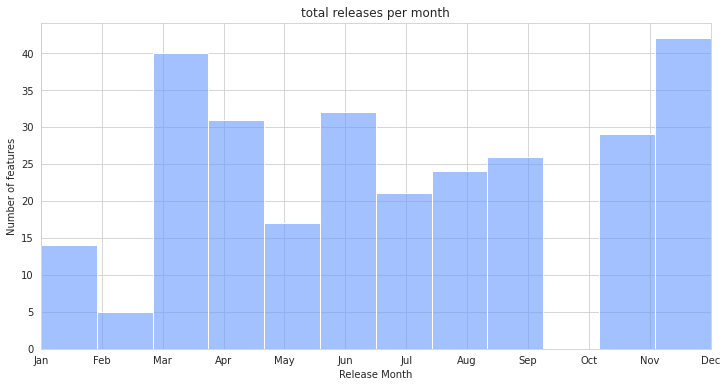

In [129]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=df2, x='Release Month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month")
plt.xlim(1,12)
plt.show()

In [130]:
summary=df2.groupby(df2['Release Month'])['Feature Title'].describe()

In [131]:
summary

,count,unique,top,freq
Release Month,,,,
1.0,14,14,Additional MSI/PLIST/GPO/MDM options: Require ...,1
2.0,5,5,Language Interpretation relay enhancement,1
3.0,40,40,Support for Apple authentication,1
4.0,31,31,Chat Etiquette Tool,1
5.0,17,17,Share Zoom Whiteboard to Zoom Chat channels,1
6.0,32,31,Support for Zoom Apps in Webinars,2
7.0,21,21,Indonesian language support,1
8.0,24,24,Enhanced access to cloud recordings,1
9.0,26,26,Profile Card enhancements,1


<h2>Figuring out how many null values are present in the feature columns</h2>

In [132]:
df2.isna().sum()

Group / Category       0
Feature Title          1
Feature Description    1
Release Date           1
Release Version        1
Release Month          1
dtype: int64

In [133]:
l=df2[df2['Feature Title'].isnull()].index.tolist()
print(len(l))

1


In [134]:
df2.iloc[[l[0]]]

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
71,(only resolved issues),NaN,NaN,NaT,NaN,NaN


<h2>It is clear that the null values are due to no data in October month. so we can remove that row</h2>

In [135]:
df2=df2.drop(l[0])

In [136]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


In [137]:
df2.isna().sum()

Group / Category       0
Feature Title          0
Feature Description    0
Release Date           0
Release Version        0
Release Month          0
dtype: int64

<h1>Wordcloud to visualise the frequency of the words</h1>



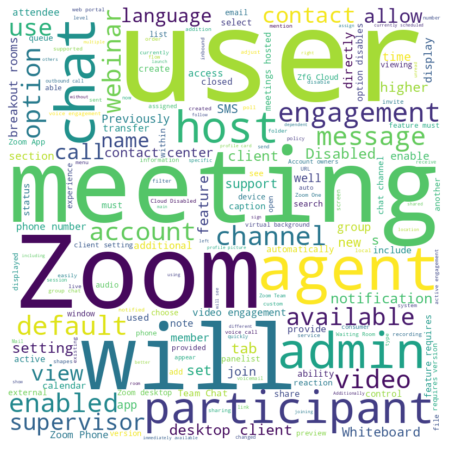

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df2['Feature Description'].values)

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h1>Bar Chart to show the frequency of the most common words in Feature Decription</h1>

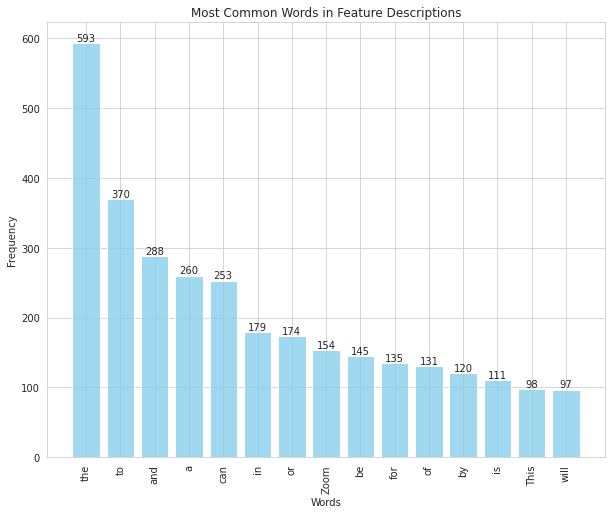

In [139]:
all_features = " ".join(df2['Feature Description'].astype(str))
words = all_features.split()
word_counts=Counter(words)
most_common=word_counts.most_common(15)

color = (0.53, 0.81, 0.92, 0.8)
plt.figure(figsize=(10,8))
plt.bar(range(len(most_common)), [val[1] for val in most_common], align='center',color=color)
plt.xticks(range(len(most_common)), [val[0] for val in most_common], rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Feature Descriptions')
for ind,word_freq in enumerate(most_common):
  plt.text(ind,word_freq[1],str(word_freq[1]),ha='center',va='bottom')
plt.show()

<h2>Now we have removed all the null rows</h2>

<h1><b>Data Preprocessing</b></h1>

<h2>1. Lowercase the text data</h2>

In [140]:
df2['Feature Title']=df2['Feature Title'].str.lower()
df2['Feature Description']=df2['Feature Description'].str.lower()

In [141]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,custom human avatars,"in addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,additional msi/plist/gpo/mdm options: disable ...,"disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,additional msi/plist/gpo/mdm options: download...,"enabled by default, when a vdi environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,additional msi/plist/gpo/mdm options: support ...,"disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,additional msi/plist/gpo/mdm options: disable ...,"enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,"users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,post-meeting virtual background auto-reversal,users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,add video to waiting room,"account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


<h1>2. Removing Stop Words and punctuations</h1>

In [142]:
nlp = spacy.load("en_core_web_sm")
def remove_stop_words(text):
  doc=nlp(text)
  no_stop_words=[token.text for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(no_stop_words)

In [143]:
df2['Feature Description']=df2['Feature Description'].apply(remove_stop_words)

In [144]:
df2['Feature Description'][0]

'addition animal avatars users create custom human avatars meetings customization options include numerous facial features colors choose'

<h1>3. Lemmatization</h1>

In [145]:
def lemmatize_text(text):
   doc=nlp(text)
   lemmatized_words=[token.lemma_ for token in doc]
   return ' '.join(lemmatized_words)

In [146]:
df2['Feature Description']=df2['Feature Description'].apply(lemmatize_text)

In [147]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,custom human avatars,addition animal avatar user create custom huma...,2022-12-27,version 5.13.3 (11494),12.0
1,General features,additional msi/plist/gpo/mdm options: disable ...,disabled default option allow admin disable us...,2022-12-20,version 5.13.0 (11216),12.0
2,General features,additional msi/plist/gpo/mdm options: download...,enable default vdi environment detect zoomplug...,2022-12-20,version 5.13.0 (11216),12.0
3,General features,additional msi/plist/gpo/mdm options: support ...,disabled default allow client support window e...,2022-12-20,version 5.13.0 (11216),12.0
4,General features,additional msi/plist/gpo/mdm options: disable ...,enable default allow admin disable desktop cli...,2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,user quickly blur background need access zoom ...,2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,post-meeting virtual background auto-reversal,user select use virtual background zoom meetin...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout room long need closed order rename ad...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,add video to waiting room,account owner admin user add video customizing...,2022-01-24,version 5.9.3 (3169),1.0



<h1>Feature Extraction</h1>

In [148]:
tfidf_vectorizer = TfidfVectorizer()

In [149]:
tfidf = tfidf_vectorizer.fit_transform(df2['Feature Description'])

In [150]:
print(tfidf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.31238481]
 ...
 [0.         0.         0.         ... 0.         0.07460912 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.22946565 0.        ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


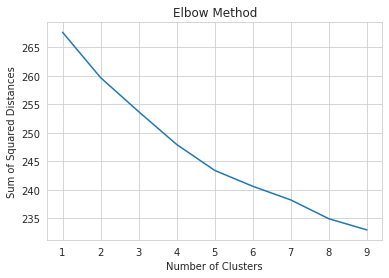

In [151]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 10), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [152]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf)
cluster_labels = kmeans.labels_
for cluster_id in range(5):
    print(f"Documents in Cluster {cluster_id}:")
    cluster_docs = df2['Feature Description'][cluster_labels == cluster_id]
    ldocs=cluster_docs.tolist()
    for doc in ldocs:
      print(doc)
    print("="*50)

Documents in Cluster 0:
user schedule meeting member chat channel directly team chat successfully schedule meeting add calendar provide notification option copy invitation appear meeting card chat feature require chat member calendar integrate zoom currently support google calendar office 365 oauth 2.0 set available account group level
chat channel owner admin create custom mention group user tag group mention 100 member assign mention group member able leave group time channel support 10 different mention group group mention work channel create
channel owner designate admin delete message send user channel previously message delete sender
toolbar shortcut chat compose box customize term order icon option currently visible customization affect main chat compose box chat group channel chat compose box reply message visibility voice message video message code snippet option control corresponding option team chat tab client setting remove
setting control chat notification update clarity e

In [153]:
cutoff_date = pd.to_datetime('2022-06-30')
df2['label']=df2['Release Date'].apply(lambda x: 'old' if x<=cutoff_date else 'New')

In [154]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month,label
0,Meeting features,custom human avatars,addition animal avatar user create custom huma...,2022-12-27,version 5.13.3 (11494),12.0,New
1,General features,additional msi/plist/gpo/mdm options: disable ...,disabled default option allow admin disable us...,2022-12-20,version 5.13.0 (11216),12.0,New
2,General features,additional msi/plist/gpo/mdm options: download...,enable default vdi environment detect zoomplug...,2022-12-20,version 5.13.0 (11216),12.0,New
3,General features,additional msi/plist/gpo/mdm options: support ...,disabled default allow client support window e...,2022-12-20,version 5.13.0 (11216),12.0,New
4,General features,additional msi/plist/gpo/mdm options: disable ...,enable default allow admin disable desktop cli...,2022-12-20,version 5.13.0 (11216),12.0,New
...,...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,user quickly blur background need access zoom ...,2022-01-24,version 5.9.3 (3169),1.0,old
278,Meeting/webinar features,post-meeting virtual background auto-reversal,user select use virtual background zoom meetin...,2022-01-24,version 5.9.3 (3169),1.0,old
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout room long need closed order rename ad...,2022-01-24,version 5.9.3 (3169),1.0,old
280,Meeting features,add video to waiting room,account owner admin user add video customizing...,2022-01-24,version 5.9.3 (3169),1.0,old


In [155]:
df2['label'].value_counts()

New    142
old    139
Name: label, dtype: int64

In [156]:
df2['label']=df2['label'].apply(lambda x: 1 if x=='New' else 0)


In [157]:
kmeans.labels_

array([4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       0, 0, 4, 0, 0, 4, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 0, 3,
       1, 1, 3, 1, 1, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 3, 1, 4, 1, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 3,
       3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 1, 1, 1, 3, 1, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 0, 0, 0, 0, 0, 4, 0, 4, 3, 3, 1, 3, 1, 1, 1, 1, 1, 4, 4, 0, 4,
       4, 4, 4, 0, 3, 4, 3, 3, 3, 1, 1, 3, 3, 1, 4, 0, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       1, 3, 4, 4, 3, 4, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 4, 4, 4, 1, 3, 3, 1, 3, 3, 1, 4, 4,
       4, 0, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

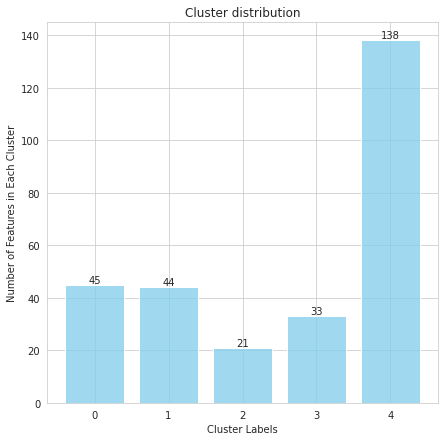

In [158]:

unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
color = (0.53, 0.81, 0.92, 0.8)
plt.figure(figsize=(7,7))
plt.bar(unique_labels, counts, align='center',color=color)
plt.gca().set_xticks(unique_labels)
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Features in Each Cluster')
plt.title('Cluster distribution')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [159]:
cluster_label_class={}

In [160]:
for i in range(5):
  a=df2['label'][cluster_labels==i]
  counts=a.value_counts()
  percent_0 = (counts[0]/counts.sum()) * 100
  percent_1 = (counts[1]/counts.sum()) * 100
  if percent_0 > percent_1+30:
    cluster_label_class[i]='Old'
  if percent_1 > percent_0+30:
    cluster_label_class[i]='New'
  print(f'Old Features Percentage {percent_0},New Features Percentage {percent_1}')

Old Features Percentage 53.333333333333336,New Features Percentage 46.666666666666664
Old Features Percentage 29.545454545454547,New Features Percentage 70.45454545454545
Old Features Percentage 80.95238095238095,New Features Percentage 19.047619047619047
Old Features Percentage 57.57575757575758,New Features Percentage 42.42424242424242
Old Features Percentage 47.82608695652174,New Features Percentage 52.17391304347826


<h1>From the above printed cluster features percentages we can discard cluster with Label 1 because the difference between new and old is negligible</h1>

In [161]:
cluster_label_class

{1: 'New', 2: 'Old'}

In [162]:
def reverse_dict(dictionary):
    reverse = {}
    for key, value in dictionary.items():
        if value not in reverse:
            reverse[value] = [key]
        else:
            reverse[value].append(key)
    return reverse


In [163]:
reversed_dict=reverse_dict(cluster_label_class)

In [164]:
reversed_dict

{'New': [1], 'Old': [2]}

<h1>Out of 5 clusters, cluster 2 contains Old features and cluster 1 contains New features</h1>

In [165]:
def model_topics(df,feature_name):
  tf_idf_vect = TfidfVectorizer()
  tfidf_vectors = tf_idf_vect.fit_transform(df[feature_name])
  lda = LatentDirichletAllocation(n_components=5)
  lda.fit(tfidf_vectors)
  feature_names = tf_idf_vect.get_feature_names_out()
  for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


In [166]:

for key, value in reversed_dict.items():
  print(f'Performing topic Modelling on {key} Clusters\n')
  temp_df=pd.DataFrame(columns=['Feature Description'])
  for label in value:
    temp_df=pd.concat([temp_df,df2[cluster_labels==label]],axis=0)
  if key=='Old':
    # Filtering all the new features from the old clusters
    temp_df=temp_df[temp_df['Release Date'] < cutoff_date]
    model_topics(temp_df,'Feature Description')
  else:
    # filtering all the old featuers from the new clusters
    temp_df=temp_df[temp_df['Release Date'] > cutoff_date]
    model_topics(temp_df,'Feature Description')
  print("="*50)

Performing topic Modelling on New Clusters

Topic 0:
chat, engagement, active, web, supervisor, display, variable, need, release, agent
Topic 1:
engagement, video, support, admin, agent, hold, voice, zoom, usb, headset
Topic 2:
agent, status, engagement, table, mute, unmute, callback, active, user, video
Topic 3:
engagement, supervisor, view, conversation, use, relevant, active, video, route, table
Topic 4:
agent, engagement, supervisor, assign, queue, video, consumer, close, flow, routing
Performing topic Modelling on Old Clusters

Topic 0:
annotate, caption, feature, content, local, affect, ability, use, zfg, cloud
Topic 1:
polling, video, file, transfer, audio, feature, chat, zfg, cloud, disable
Topic 2:
meet, access, webinar, chat, control, reaction, enforcesignintojoin, need, zoom, override
Topic 3:
locally, record, connect, computer, ability, audio, feedback, non, verbal, open
Topic 4:
meeting, cloud, zfg, disable, use, host, option, default, disabled, share


In [167]:
new_df=df2[cluster_labels==1]
filtered_new_df=new_df[new_df['Release Date'] > cutoff_date]
filtered_new_df['Feature Title']

30                  show variables in active engagements
31                    enhancements to engagement sidebar
32             invite another user to a video engagement
33                             monitor video engagements
34                                  change agents status
35     enhancements to engagement information in zoom...
36             hold/un-hold support for usb hid headsets
38                                      transfer to flow
40                barge or listen in on voice conference
41                                     view flow history
66                                          mirror video
67                     release engagements back to queue
69                              support for usb headsets
70                             sms from voice engagement
92                         upgrade voice or sms to video
94                      specify skills when transferring
96                    enhancements to viewing recordings
112                       selec

In [168]:
indexes=filtered_new_df.index
for i in indexes:
  print(filtered_new_df.loc[i, 'Feature Description'])

configure variable account owner admin enable option display variable zoom desktop client enable variable display inbound notification profile engagement tab active engagement feature enable zoom
agent invite engagement transfer conference appear conference section engagement handle assign agent previously active engagement appear active section invite
agent invite contact center user active video engagement
supervisor use active engagement tab view active video engagement view video engagement party video engagement aware supervisor view
supervisor manually change status agent add ready reason team page zoom desktop client agent receive notification status change supervisor
enhancement engagement information display zoom desktop client agent view additional detail global custom variable display engagement custom global variable display dedicated section engagement tab agent click urls launch web browser url link provide variable
agent use support usb hide headset hold un hold voice en

<h1>Based on the results presented, the following factors can be identified as key differentiators between the old and new versions of Zoom</h1>
<ul>
  <li>Engagements Handling for Agents</li>
<li>Active Engagement and Video Engagement Viewing</li>
<li>Account and Admin Configuration Variables</li>
<li>Display Options for Variables in Zoom Desktop Client and Inbound Notification Profile Engagement Tab</li>
<li>Headset Usage and Voice Engagement Transfer</li>
</ul>


<h1>Webex Dataset</h1>

In [169]:
webex_path='/content/drive/MyDrive/dataset/webex-dataset.csv'

In [170]:
webex_df=pd.read_csv(webex_path)

In [171]:
df3=webex_df.copy()

<h1><b>Exploratory Data Analysis</b></h1>

<h1>Histogram shows number of features released per month for Webex dataset</h1>

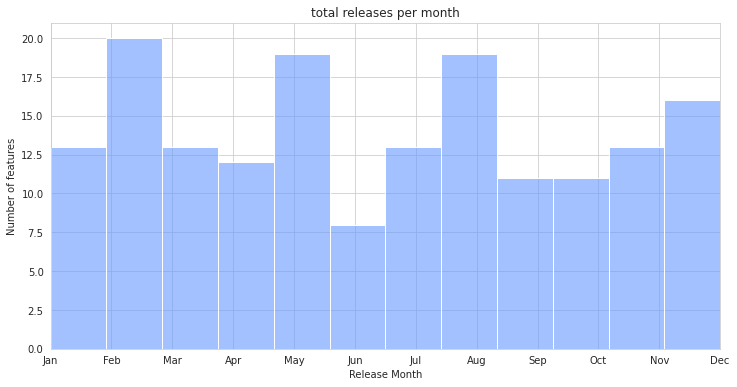

In [172]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=df3, x='release_month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month")
plt.xlim(1,12)
plt.show()

<h1>Wordcloud to visualise the frequency of the words</h1>


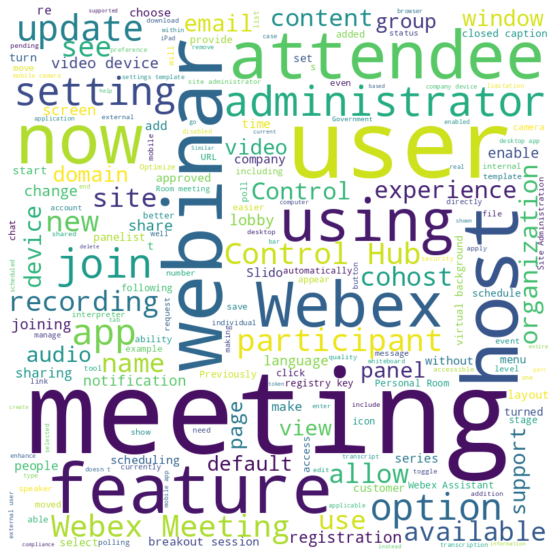

In [173]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df3['feature_discription'].values)

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1><b>Data Preprocessing</b></h1>

<h2>1. Lowercase the text data</h2>

In [174]:
df3['feature_title']=df3['feature_title'].str.lower()
df3['feature_discription']=df3['feature_discription'].str.lower()

In [175]:
df3

,feature_title,feature_discription,release_month
0,improved toolbar for shared content,we’ve made interacting with shared content eas...,4
1,move webex meetings from your desktop to mobil...,we are introducing the move meeting to mobile ...,4
2,redirect attendee to a url address after a mee...,host can enter a url address when they set up ...,4
3,new option for high fidelity content sharing,optimize for 3d is a new sharing optimization ...,4
4,ability to share application windows instead o...,this feature optimizes the webex meetings cont...,4
...,...,...,...
163,simultaneous interpretation: enable or disable...,simultaneous interpretation is supported in pe...,9
164,open text – topics or clusters,the type of responses that are being submitted...,9
165,new settings available in webex sidebar,four new expandable sections are now available...,9
166,open text - display name,this feature adds the option to display a name...,9


<h1>2. Removing Stop Words and punctuations</h1>

In [176]:
df3['feature_discription']=df3['feature_discription'].apply(lambda x: x.replace('\n',' '))
df3['feature_discription']=df3['feature_discription'].apply(remove_stop_words)

<h2>3. Removing extra spaces</h2>

In [177]:
df3['feature_discription']=df3['feature_discription'].apply(lambda x: re.sub(r"\s{2,}", " ", x))

In [178]:
df3['feature_discription'][0]

'interacting shared content easier moving tools fade bar dedicated toolbar stage access time sharing content zoom open annotation tools blocking view shared'

<h2>4. Lemmatizing the text</h2>

In [179]:
df3['feature_discription']=df3['feature_discription'].apply(lemmatize_text)

In [180]:
df3['feature_discription'][0]

'interact share content easy move tool fade bar dedicate toolbar stage access time sharing content zoom open annotation tool block view share'

<h1>Bar Chart to show the frequency of the most common words in Feature Decription column</h1>

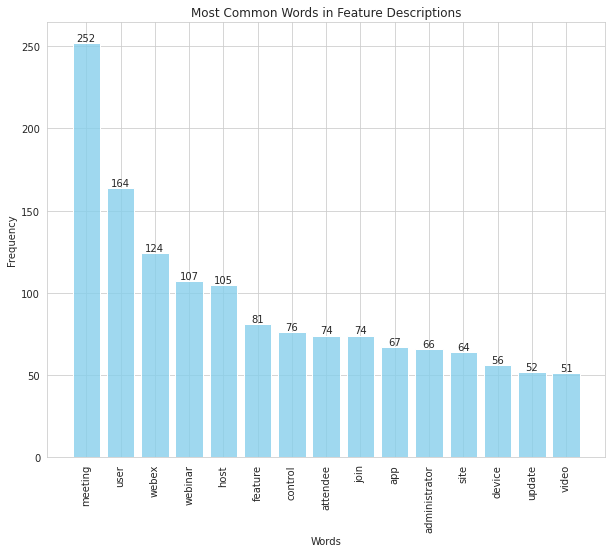

In [181]:
all_features = " ".join(df3['feature_discription'].astype(str))
words = all_features.split()
word_counts=Counter(words)
most_common=word_counts.most_common(15)

color = (0.53, 0.81, 0.92, 0.8)
plt.figure(figsize=(10,8))
plt.bar(range(len(most_common)), [val[1] for val in most_common], align='center',color=color)
plt.xticks(range(len(most_common)), [val[0] for val in most_common], rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Feature Descriptions')
for ind,word_freq in enumerate(most_common):
  plt.text(ind,word_freq[1],str(word_freq[1]),ha='center',va='bottom')
plt.show()

<h1>Feature Extraction</h1>

In [182]:
webex_tfidf = tfidf_vectorizer.fit_transform(df3['feature_discription'])

In [183]:
webex_tfidf

<168x1029 sparse matrix of type '<class 'numpy.float64'>'
	with 4163 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


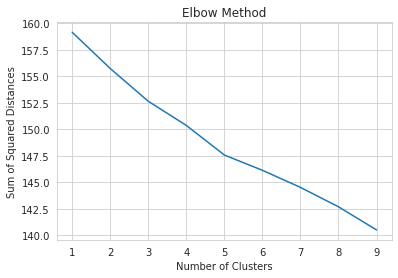

In [184]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(webex_tfidf)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 10), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [185]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(webex_tfidf)
cluster_labels = kmeans.labels_
for cluster_id in range(5):
    print(f"Documents in Cluster {cluster_id}:")
    cluster_docs = df3['feature_discription'][cluster_labels == cluster_id]
    ldocs=cluster_docs.tolist()
    for doc in ldocs:
      print(doc)
    print("="*50)

Documents in Cluster 0:
interact share content easy move tool fade bar dedicate toolbar stage access time sharing content zoom open annotation tool block view share
introduce meet mobile feature user scan qr code mobile camera meeting webex meeting mobile app disrupt disconnecting meeting
optimize 3d new sharing optimization available customer request customer success manager feature use additional bandwidth reduce color artifact share high fidelity 3d model increase quality aid real time collaboration type content include computer aid design medical imaging feature support webex meeting window mac desktop app app device join meet quality reduce participant normal level quality reduce normal level meet record enable optimize 3d option appear drop selection share content dialog optimization automatically optimize select feature turn request
feature optimize webex meeting content share experience sharing application previously user share application share entire screen mask area outside 

In [186]:
cutoff_month=6
df3['label']=df3['release_month'].apply(lambda x: 'old' if x<=cutoff_month else 'New')

In [187]:
df3['label'].value_counts()

old    85
New    83
Name: label, dtype: int64

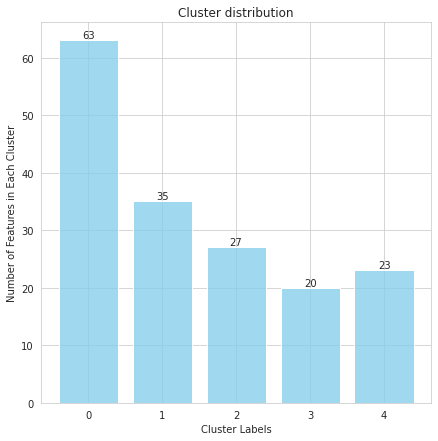

In [193]:
unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
color = (0.53, 0.81, 0.92, 0.8)
plt.figure(figsize=(7,7))
plt.bar(unique_labels, counts, align='center',color=color)
plt.gca().set_xticks(unique_labels)
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Features in Each Cluster')
plt.title('Cluster distribution')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [188]:
cluster_label_class={}
for i in range(5):
  a=df3['label'][cluster_labels==i]
  counts=a.value_counts()
  percent_0 = (counts[0]/counts.sum()) * 100
  percent_1 = (counts[1]/counts.sum()) * 100
  if percent_0 > percent_1+25:
    cluster_label_class[i]='Old'
  if percent_1 > percent_0+25:
    cluster_label_class[i]='New'
  print(f'Old Features Percentage {percent_0},New Features Percentage {percent_1}')

Old Features Percentage 63.49206349206349,New Features Percentage 36.507936507936506
Old Features Percentage 62.857142857142854,New Features Percentage 37.142857142857146
Old Features Percentage 66.66666666666666,New Features Percentage 33.33333333333333
Old Features Percentage 55.00000000000001,New Features Percentage 45.0
Old Features Percentage 52.17391304347826,New Features Percentage 47.82608695652174


<h1>out of 5 clusters 1,2,3 clusters heavily contains the old features</h1>

In [189]:
 cluster_label_class

{0: 'Old', 1: 'Old', 2: 'Old'}

In [190]:
reversed_dict=reverse_dict(cluster_label_class)

<h1>Performing LDA on clusters(OLD) 1,2,3</h1>

In [196]:
old_webex_features_grouped=None

In [197]:
for key, value in reversed_dict.items():
  print(f'Performing topic Modelling on {key} Clusters\n')
  temp_df=pd.DataFrame(columns=['feature_discription'])
  for label in value:
    temp_df=pd.concat([temp_df,df3[cluster_labels==label]],axis=0)
  if key=='Old':
    # Filtering all the new features from the old clusters
    temp_df=temp_df[temp_df['release_month'] <=6]
    old_webex_features_grouped=temp_df
    model_topics(temp_df,'feature_discription')
  else:
    # filtering all the old featuers from the new clusters
    temp_df=temp_df[temp_df['release_month'] > 6]
    model_topics(temp_df,'feature_discription')
  print("="*50)

Performing topic Modelling on Old Clusters

Topic 0:
setting, share, timer, add, meeting, slido, allow, new, host, api
Topic 1:
webinar, option, window, audio, app, control, registration, meeting, series, feature
Topic 2:
meeting, app, webex, mobile, user, background, poll, open, virtual, slido
Topic 3:
language, session, transcription, english, host, breakout, transcript, upload, translation, balance
Topic 4:
caption, turn, close, 000, site, user, scale, app, provide, domain


In [199]:
inds=old_webex_features_grouped.index
for i in inds:
  print(old_webex_features_grouped.loc[i,'feature_title'])

improved toolbar for shared content
move webex meetings from your desktop to mobile app using a qr 
code
new option for high fidelity content sharing
ability to share application windows instead of the whole desktop
a new share tab added to meeting settings
remove bot installation from 1:1 conversation
new virtual backgrounds, both static and animated
background pip (picture-in-picture) support for ipad users
new location for opened embedded apps
shared timer app for webex meetings and webex webinars
google workspace add-on user interface improvements
real-time transcription for 13 spoken languages
raise hand button has moved to control bar
end webcast after all content is displayed
web app: annotation support
filter for slido events in webex panel
administrators can manage images used in virtual background
align simultaneous interpretation in webinar with webex meeting
web app: remove background noise
web app: pop-out panels from the meeting window
receive webex webhooks notifications

<h1>Based on the above results, Old features primarily focused on:</h1>
<ul>
  <li>Transcription support for multiple labguages</li>
<li>Ability to share application windows instead of the whole desktop</li>
<li>New and improved scheduler for meetings and webinars</li>
<li>Support for webinar series</li>
<li>Meetings quality APIs.</li>
</ul>

<h1>Given that we do not have any clusters that are overwhelmingly dominated by new features (i.e., comprising at least 65% new features), let us manually review clusters 4 and 5 to analyze their specific focus.</h1>

In [205]:
new_features_cluster_four= df3[cluster_labels==3]
new_features_cluster_four=new_features_cluster_four[new_features_cluster_four['release_month'] > cutoff_month]

In [206]:
new_features_cluster_four

,feature_title,feature_discription,release_month,label
22,hide non-video users on video devices,premise register video device cloud register d...,8,New
23,change the paired device meeting layout from w...,join meeting pair cisco room desk device mobil...,8,New
37,easily control how your self-view displays,update give control want video meeting webinar...,12,New
42,option to hide profile picture in the grid lay...,mobile user hide profile picture self view gri...,12,New
45,restrict meeting experiences using registry ke...,administrator restrict company device adhere c...,12,New
82,immersive share on video devices,user premise register video device cloud dx sx...,7,New
142,restrict meeting experiences using registry ke...,administrator restrict company device adhere c...,11,New
159,reorder participants on the stage,reorder participant move stage simply drag dro...,9,New
162,shared content in stage view is now larger,share content meeting webinar share content la...,9,New


In [207]:
old_features_cluster_four= df3[cluster_labels==3]
old_features_cluster_four=old_features_cluster_four[old_features_cluster_four['release_month'] <= cutoff_month]

In [208]:
old_features_cluster_four

,feature_title,feature_discription,release_month,label
6,slido open-text polls,small effective change style label video windo...,4,old
7,new name label style for meetings and devices,small effective change style label video windo...,4,old
59,automatically hide self-view when video is off,self view automatically hide turn video give s...,2,old
60,enable sync my stage for everyone,host cohost sync exact layout stage attendee p...,2,old
63,anonymize meeting attendee display names (bet...,enable host use attendee name private option s...,2,old
66,no more inappropriate emojis in q&a and word-c...,profanity filter q&a announce early add word c...,2,old
75,webex recordings quick forward and rewind buttons,view webex recording choose skip ahead backwar...,1,old
93,grid view support for up to 81 videos,grid view meeting webinar event classic suppor...,6,old
102,introducing people focus (beta),update excited introduce new way view grid vie...,3,old
111,"easy to use audio mute state management, recor...",possible accurately reflect mute status meet p...,3,old


In [209]:
new_features_cluster_five= df3[cluster_labels==4]
new_features_cluster_five=new_features_cluster_five[new_features_cluster_five['release_month'] > cutoff_month]

In [214]:
indices4=new_features_cluster_four.index
for i in indices4:
  print(new_features_cluster_four.loc[i,'feature_title'])

hide non-video users on video devices
change the paired device meeting layout from webex app
easily control how your self-view displays
option to hide profile picture in the grid layout when self-video is 
off
restrict meeting experiences using registry keys on your 
company devices
immersive share on video devices
restrict meeting experiences using registry keys on your 
company devices
reorder participants on the stage
shared content in stage view is now larger


In [212]:
indices=new_features_cluster_five.index
for i in indices:
  print(new_features_cluster_five.loc[i,'feature_title'])

compliance feature for it administration to block use of voip in 
meetings for their regulated users
edit in-meeting display name
new lobby controls for personal room meetings
forced authentication before joining webex meetings 
ability for it administrators to control secondary camera 
experience for their meeting users
trusted domains for personal room meetings and internal only 
personal room meetings
enhanced meeting security with auto admit
lobby chime in meetings
ability to disable broadcast message
change default to not allow cohosts to end meeting
simultaneous interpretation: enable or disable interpretation ad-
hoc and set a default language for scheduled meetings, webinars, and 
personal room meetings


<h1>From the above results we are able to conclude that new features focused a lot on:</h1>

<ul>
 <li>Meeting security and control.</li>
<li>Customization and personalization options.</li>
<li>Enhanced meeting features.</li>
<li>Enhancing video meeting experience</li>
<li>Improving self-view and layout</li>
<li>Restricting meeting experiences</li>
</ul>

<h1>Overall the following differentiates old vs new for webex</h1>
<p>Old Features focused on </p>
<ul>
<li>Transcription support for multiple labguages</li>
<li>Ability to share application windows instead of the whole desktop</li>
<li>New and improved scheduler for meetings and webinars</li>
<li>Support for webinar series</li>
<li>Meetings quality APIs.</li>
</ul>
<hr/>
<p>New Features focused on </p>
<ul>
 <li>Meeting security and control.</li>
<li>Customization and personalization options.</li>
<li>Enhanced meeting features.</li>
<li>Enhancing video meeting experience</li>
<li>Improving self-view and layout</li>
<li>Restricting meeting experiences</li>
</ul>

